In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp # Equivalents to Numpy functions designed to
                        # work well with JAX.
from jax import random, grad, jit
from astropy.io import fits # Used to read data files if necessary.


#### Here random code

In [ ]:
def compute_column_density(temperature, chemical_potential, particle_number, radial_frequency, axial_frequency):
    # Constants (in SI units)
    hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
    m = 1.44316060e-25  # Mass of 87Rb atom (kg)
    k_B = 1.380649e-23  # Boltzmann constant (J/K)
    a_s = 5.77e-9  # s-wave scattering length for 87Rb (m)
    
    # Interaction term g
    g = 4 * np.pi * hbar**2 * a_s / m
    
    # Calculate trap frequencies in Hz
    omega_r = 2 * np.pi * radial_frequency
    omega_z = 2 * np.pi * axial_frequency
    
    # Thomas-Fermi radius
    R_r = np.sqrt(2 * chemical_potential / (m * omega_r**2))
    R_z = np.sqrt(2 * chemical_potential / (m * omega_z**2))
    
    # Create a grid for x and y
    x = np.linspace(-3*R_r, 3*R_r, 200)
    y = np.linspace(-3*R_r, 3*R_r, 200)
    X, Y = np.meshgrid(x, y)
    
    # Thomas-Fermi distribution in 3D
    def thomas_fermi_density(x, y, z):
        density = (chemical_potential - 0.5 * m * (omega_r**2 * (x**2 + y**2) + omega_z**2 * z**2)) / g
        return np.maximum(density, 0)
    
    # Integrate density along the z-axis to get column density
    z_max = R_z
    z = np.linspace(-z_max, z_max, 200)
    column_density = np.zeros(X.shape)
    
    for i in range(len(x)):
        for j in range(len(y)):
            density_along_z = thomas_fermi_density(x[i], y[j], z)
            column_density[i, j] = np.trapz(density_along_z, z)
    
    return X, Y, column_density

def plot_column_density(X, Y, column_density):
    pix_size = 6.5e-6 / 2.63
    X = X / pix_size
    Y = Y / pix_size
    plt.figure(figsize=(8, 6))
#     plt.contourf(X, Y, column_density, levels=50, cmap='viridis')
    plt.imshow(column_density, aspect=1, cmap='viridis')
    plt.colorbar(label='Column Density')
    plt.title('Column Density of a Bose-Einstein Condensate')
    plt.show()



In [ ]:
temperature = 10e-9  # Temperature in Kelvin
chemical_potential = 1e-30  # Chemical potential in Joules
particle_number = 1e7  # Number of particles
radial_frequency = 1  # Radial trapping frequency in Hz
axial_frequency = 1015  # Axial trapping frequency in Hz

X, Y, column_density = compute_column_density(temperature, chemical_potential, particle_number, radial_frequency, axial_frequency)
plot_column_density(X, Y, column_density)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pix_size = 6.5e-6 / 2.63

def compute_column_density(temperature, chemical_potential, particle_number, radial_frequency, axial_frequency):
    # Constants (in SI units)
    hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
    m = 1.44316060e-25  # Mass of 87Rb atom (kg)
    k_B = 1.380649e-23  # Boltzmann constant (J/K)
    a_s = 5.77e-9  # s-wave scattering length for 87Rb (m)
    
    # Interaction term g
    g = 4 * np.pi * hbar**2 * a_s / m
    
    # Calculate trap frequencies in Hz
    omega_r = 2 * np.pi * radial_frequency
    omega_z = 2 * np.pi * axial_frequency
    
    # Thomas-Fermi radius
    R_r = np.sqrt(2 * chemical_potential / (m * omega_r**2))
    R_z = np.sqrt(2 * chemical_potential / (m * omega_z**2))
    
    
    # Create a grid for x and z
    x = np.linspace(-pix_size*200, pix_size*200, 500)
    z = np.linspace(-pix_size*200, pix_size*200, 500)
    X, Z = np.meshgrid(x, z)
    
    # Thomas-Fermi distribution in 3D
    def thomas_fermi_density(x, y, z):
        density = (chemical_potential - 0.5 * m * (omega_r**2 * (x**2 + y**2) + omega_z**2 * z**2)) / g
        return np.maximum(density, 0)
    
    # Maxwell-Boltzmann distribution in 3D
    def maxwell_boltzmann_density(x, y, z):
        return particle_number * (m / (2 * np.pi * k_B * temperature))**(3/2) * np.exp(-m * (omega_r**2 * (x**2 + y**2) + omega_z**2 * z**2) / (2 * k_B * temperature))
    
    # Integrate density along the y-axis to get column density
    y_max = R_r
    y = np.linspace(-y_max, y_max, 200)
    column_density_tf = np.zeros(X.shape)
    column_density_mb = np.zeros(X.shape)
    
    for i in range(len(x)):
        for j in range(len(z)):
            density_along_y_tf = thomas_fermi_density(x[i], y, z[j])
            density_along_y_mb = maxwell_boltzmann_density(x[i], y, z[j])
            column_density_tf[i, j] = np.trapz(density_along_y_tf, y)
            column_density_mb[i, j] = np.trapz(density_along_y_mb, y)
    
    # Total column density is the sum of TF and MB distributions
    column_density_total = column_density_tf + column_density_mb
    
    return X, Z, column_density_total


In [ ]:
temperature = 100e-9  # Temperature in Kelvin
chemical_potential = 1e-30  # Chemical potential in Joules
particle_number = 1e7  # Number of particles
radial_frequency = 1015  # Radial trapping frequency in Hz
axial_frequency = 15  # Axial trapping frequency in Hz
pix_size = 6.5e-6 / 2.63  # Pixel size in meters
X, Z, column_density = compute_column_density(temperature, chemical_potential, particle_number, radial_frequency, axial_frequency)

In [ ]:
X = X / pix_size
Z = Z / pix_size

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
im = ax[0].contourf(X, Z, column_density, levels=90, cmap='viridis')
plt.suptitle('Column Density of a Bose-Einstein Condensate (Camera View)')
ax[1].set_xlabel('x (pixels)')
ax[0].set_ylabel('z (pixels)')
ax[1].set_ylabel(r'Col. Density $\times 10^8$')
ax[1].plot(X[250], column_density[250]/1e8)

plt.tight_layout()
plt.colorbar(im, ax=ax, label='Column Density')

plt.show()


### Fabios

In [3]:
# Prepare physical constants and quantities related to the setup.
hbar = 63.50779926
mass = 22.98976928
kB = 8314.462621
sc_len = 2.802642e-3
U0 = 4*jnp.pi*hbar**2*sc_len/mass
freq_rho = .128 # Default values. Datasets from the lab may contain
freq_z = .032   # more accurate ones.
lamb0 = 589.1e-3
k = 2*jnp.pi/lamb0

def polarizability(det_1, lamb0, linew=2*jnp.pi*9.7e3):
    """
    The function for defining polarizability, based on detuning
    and initial wavelength. Taken from OAH_functions.py,
    with the angle dependence removed.
    :param det_1: Detuning parameter
    :param lamb0: The wavelength of the light
    :param linew: Linewidth
    :return: Polarizability
    """
    det_0 = det_1 + 15.8e3
    det_2 = det_1 - 34.4e3
    sigm_l = 3 * lamb0 ** 2 / (2 * np.pi)
    k0 = 2 * np.pi / lamb0

    return 2j/3 * sigm_l / k0 * (1 / (1 - 2j * det_0 / linew) \
        + 1 / (1 - 2j * det_1 / linew) +1 / (1 - 2j * det_2 / linew))

polariz = polarizability(2*jnp.pi*35e3, lamb0)

#%%
# Set up spatial coordinate arrays for use in calculating the densities.
pixsize = 6.5/2.63
x = jnp.arange(-pixsize*50, pixsize*50, pixsize)
z = jnp.arange(-pixsize*1280, pixsize*1280, pixsize)
x2, z2 = jnp.meshgrid(x, z, indexing="ij")
# The optional argument indexing="ij" here makes it so that the
# x-coordinates change along the first axis in the meshgrids. So to
# access the point (x,z) in these arrays, one uses array[x,z].
xshape = 100
zshape = 2560

#%%
# Variables that govern the fitting routine.
key = random.PRNGKey(1144735523) # Initialize a JAX PRNG key.
# The hyperparameters of the Adam algorithm are given specific values
# for each model parameter.
alpha_adam = jnp.array((.06, .00006, .006, .06, .00015))
beta1_adam = jnp.array((.99, .9, .99, .99, .999))
beta2_adam = jnp.array((.99999, .99999, .99999, .99999, .999))
# Likewise for the convergence criterion.
conv_crit = jnp.array((.000001, .0001, .0001, .0005, .001))

#%%
# Functions to predict the phase delay due to a condensate.

def transform_coords(x, z, x0, z0, theta):
    """Shifts and rotates coordinate system.
    
    Used in the column density functions to move the center of the condensate and rotate it.
    Parameters:
    x: Coordinate array 1
    z: Coordinate array 2
    x0: Center position for x
    z0: Center position for z
    theta: Angle of rotation

    Returns:
    x_rot: Array of shifted and rotated x-coordinates
    z_rot: Array of shifted and rotated z-coordinates
    """
    x_trans = x - x0
    z_trans = z - z0
    x_rot = x_trans*jnp.cos(theta) + z_trans*jnp.sin(theta)
    z_rot = z_trans*jnp.cos(theta) - x_trans*jnp.sin(theta)
    return x_rot, z_rot

def ThomasFermi_column(params, x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z):
    """Calculates column density profile for the condensate.
    
    Parameters:
    params: array of chemical potential, temperature, offsets in x and z directions
    and rotation angle in that order.
    x: array of x coordinates
    z: array of z coordinates
    
    Returns: 2D array representing the density profile."""
    new_x, new_z = transform_coords(x, z, params[2], params[3], params[4])
    rho_02 = 2*params[0]/mass/omega_rho**2
    z_02 = 2*params[0]/mass/omega_z**2
    parabola = (1-new_x**2/rho_02-new_z**2/z_02)
    nonneg_parabola = (parabola + abs(parabola))/2
    profile = jnp.where(nonneg_parabola!=0, 4/3*jnp.sqrt(2*params[0]/mass)/omega_rho*params[0]/U0\
        *(nonneg_parabola)**(3/2), 0)
    return profile

def semiclassical_column(params, x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z):
    """Calculates the column density profile for the thermal cloud.
    
    Parameters:
    params: array of chemical potential, temperature, offsets in x and z directions
    and rotation angle in that order.
    x: array of x coordinates
    z: array of z coordinates
    
    Returns: 2D array representing the density profile."""
    neo_x, neo_z = transform_coords(x, z, params[2], params[3], params[4])
    return mass*(kB*params[1])**2/(2*jnp.pi*hbar**3*omega_rho)\
        *jnp.exp((params[0] - .5*mass*(omega_rho**2*neo_x**2\
            +omega_z**2*neo_z**2))/kB/params[1])

def bimod_column(params, x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z):
    """Adds the column density profiles.
    
    Parameters:
    params: array of chemical potential, temperature, offsets in x and z directions
    and rotation angle in that order.
    x: array of x coordinates
    z: array of z coordinates
    
    Returns: 2D array representing the density profile."""
    return semiclassical_column(params, x, z, omega_rho, omega_z)\
        + ThomasFermi_column(params, x, z, omega_rho, omega_z)

def density_to_phaseshift(density):
    """Converts column density to phase shift image."""
    return jnp.real(k*polariz/2*density)

def compose_with_shift(density_func):
    """Returns the composition of any density function with
    density_to_phaseshift."""
    return lambda params, x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z:\
        density_to_phaseshift(density_func(params, x, z, omega_rho, omega_z))


In [2]:

# %%
# Define the loss function and its gradient.
def mse(preds, data):
    """Returns the mean square error of preds compared to data."""
    return jnp.mean((preds - data)**2)

def Poisson_loss(preds, data):
    """Returns the Poisson loss function of preds compared to data."""
    return jnp.sum(preds - data*jnp.log(preds))

def loss_fun(params, data, bounds, x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z):
    """Predicts the form of the data based on parameters and calculates
    the MSE compared to the real data.
    
    Parameters:
    params: An array containing estimates for chemical potential, temperature,
    center coordinates and angle.
    data: The real data to compare the predictions to.
    bounds: Tuple of values to scale the predictions with. These are
    automatically calculated by run_fit.
    
    Returns: The MSE of the predictions based on params and the data."""
    preds = fitfunc(params, x, z, omega_rho, omega_z)
    # If modelled phase shift is positive, divide by maximum of data.
    # Else divide by its minimum (without the minus sign).
    if polariz.real>0:
        preds /= bounds[1]
    else:
        preds /= -bounds[0]
    return mse(preds, data)

grad_loss_fun = grad(loss_fun, 0)
# %%
@jit
def adam_step(params, moments, t, data, bounds, alpha=.001, beta1=.9, beta2=.999, epsilon=1e-8,\
    x=x2, z=z2, omega_rho=freq_rho, omega_z=freq_z):
    """Updates the Adam optimization algorithm.
    
    It is jit-compiled using the decorator above to make it faster."""
    para_grad = grad_loss_fun(params, data, bounds, x, z, omega_rho, omega_z)
    m_t = beta1*moments[0] + (1-beta1)*para_grad
    v_t = beta2*moments[1] + (1-beta2)*para_grad**2
    m_hat = m_t/(1-beta1**(t+1))
    v_hat = v_t/(1-beta2**(t+1))
    new_params = params - alpha*m_hat/(jnp.sqrt(v_hat) + epsilon)
    new_moments = jnp.array((m_t, v_t))
    return new_params, new_moments

# Below is the update step for standard gradient descent. If testing with
# this simpler algorithm is needed, simply uncomment the function and change
# the call to adam_step in run_fit to this.

# def gradient_descent_step(params, lr=1e-1, x=xm, y=ym):
#     para_grad = grad_loss_fun(params, x, y, data=noisy_image)
#     print(loss_fun(params, data=noisy_image))
#     print(para_grad)
#     params = params - lr*para_grad
#     return params

def multishuffle(key, arr):
    """A function to shuffle all the elements of a 2D array.
    
    Parameters:
    key: A JAX PRNG key. To shuffle multiple arrays the same way, call this
    function on each of them with the same key.
    arr: The array to be shuffled.
    
    Returns:
    shuffled_arr: An array with the same shape as arr, with the elements
    of arr randomly shuffled."""
    orig_shape = jnp.shape(arr)
    if jnp.ndim(arr)==2:
        arr = jnp.reshape(arr, jnp.size(arr))
        arr = random.permutation(key, arr)
    else:
        arr = jnp.reshape(arr, (orig_shape[0], -1))
        arr = random.permutation(key, arr, 1)
    return jnp.reshape(arr, orig_shape)
#%%
fitfunc = compose_with_shift(bimod_column)

def run_fit(key, initial_guess=None, data=None, crop=None, stepnumber=20000, conv_samplesize=2000, omega_rho=freq_rho, omega_z=freq_z):
    """Run the fitting routine on a real image.
    
    Parameters:
    key: A JAX PRNG key.
    initial_guess: An array containing initial guesses for the five model parameters.
    If not given, guesses are randomly generated.
    data: The phase shift image to fit to. If not given, a simulation
    with Gaussian noise is created.
    crop: A tuple of 4 integers indicating the range of indices in the data
    to fit to. If not given, the whole image is used.
    stepnumber: How many update steps may be taken at most before the fit stops.
    conv_samplesize: How many subsequent estimates to consider in determining
    convergence.
    
    Returns:
    mean: The final estimate for each of the model parameters.
    std: The corresponding standard deviations.
    initial_guess: The initial guess for the parameters.
    gt: If an image was simulated, this is an array of the ground truth parameters.
    If an image was given, this is None.
    t_conv: The time step at which convergence was reached. If the routine didn't
    converge, this is None.
    loss_start: The value of the loss function for the initial guess.
    loss_final: The value of the loss function for the final estimate.
    all_guesses: An array of all parameter estimates that contributed to
    the estimate given by mean.
    """
    # Generate initial_guess if none was given.
    if initial_guess is None:
        key, subkey = random.split(key)
        initial_guess = random.normal(subkey, (5,))*jnp.array((10., .01, 1., 10., .01))+jnp.array((50., .05, 0., 0., 0.))
    params_guess = initial_guess
    moments = jnp.zeros(2) # Initialize Adam's adaptive moments.
    all_guesses = jnp.stack((initial_guess,), 0)
    key, shuffle_key = random.split(key)
    # Crop the coordinate arrays if a crop was specified.
    if crop is not None:
        x_crp = x2[crop[0]:crop[1], crop[2]:crop[3]]
        z_crp = z2[crop[0]:crop[1], crop[2]:crop[3]]
    else:
        x_crp = x2
        z_crp = z2
    smx = multishuffle(shuffle_key, x_crp)
    smz = multishuffle(shuffle_key, z_crp)
    # Simulate an image if none was given.
    if data is None:
        key, *subkeys = random.split(key, 3)
        gt = initial_guess + random.normal(subkeys[0], (5,))*jnp.array((10., .001, 1., 10., .01))
        simulated_data = fitfunc(gt, x_crp, z_crp)
        data = simulated_data + random.normal(subkeys[1], jnp.shape(simulated_data))
    else:
        gt = None
    # Scale the data and define scaling factors for the predictions.
    bounds = (jnp.min(data), jnp.max(data))
    datanegative, datapositive = 0, 0
    if (data<0).any():
        datanegative = jnp.where(data<=0, -data/bounds[0], 0)
    if (data>0).any():
        datapositive = jnp.where(data>=0, data/bounds[1], 0)
    data = datanegative + datapositive
    if crop is not None:
        data = data[crop[0]:crop[1], crop[2]:crop[3]]
    loss_start = loss_fun(initial_guess, data, bounds, x_crp, z_crp, omega_rho, omega_z)
    smdata = multishuffle(shuffle_key, data)
    t_conv = None

    for t in range(stepnumber):
        # Take a batch of random points from the coordinates and the data.
        batchx = jnp.arange(t*30, (t+1)*30)
        batchz = jnp.floor_divide(jnp.arange(t*200, (t+1)*200), zshape)
        xbatch = jnp.take(jnp.take(smx, batchx%xshape, 0, mode="wrap"), batchz%zshape, 1, mode="wrap")
        zbatch = jnp.take(jnp.take(smz, batchx%xshape, 0, mode="wrap"), batchz%zshape, 1, mode="wrap")
        trainbatch = jnp.take(jnp.take(smdata, batchx%xshape, 0, mode="wrap"), batchz%zshape, 1, mode="wrap")
        new_params, moments = adam_step(params_guess, moments, t, trainbatch, bounds, 
                                alpha=alpha_adam, beta1=beta1_adam, beta2=beta2_adam, 
                                x=xbatch, z=zbatch, omega_rho=omega_rho, omega_z=omega_z)
        # Stop model parameters from getting too small to prevent nans.
        # This method isn't perfect, but it works most of the time.
        if new_params[0]<1e-4:
            new_params = new_params.at[0].set(1e-4)
        if new_params[1]<1e-8:
            new_params = new_params.at[1].set(1e-8)
        all_guesses = jnp.append(all_guesses, jnp.stack((new_params,), 0), 0)
        if t>=conv_samplesize-1:
            """Once we have enough estimates, this part of the program begins
            checking for convergence. This is done by taking the average of
            the differences between subsequent estimates. We then take the
            absolute value of the average and divide it by the average of the
            estimates themselves. If this is small enough, as defined by the
            variable conv_crit, the fitting routine stops and the current average
            is returned as the final estimate."""
            all_guesses = jnp.delete(all_guesses, 0, 0)
            mean = jnp.mean(all_guesses, 0)
            nonzero_mean = jnp.abs(jnp.where(mean, mean, 1e-8))
            diffs = jnp.diff(all_guesses, axis=0)
            if (jnp.abs(jnp.mean(diffs, 0)/nonzero_mean)<=conv_crit).all():
                t_conv = t
                break
        
        params_guess = new_params
    std = jnp.std(all_guesses, 0)
    loss_final = loss_fun(params_guess, data, bounds, x_crp, z_crp, omega_rho, omega_z)
    return [mean, std, initial_guess, gt, t_conv, loss_start, loss_final, all_guesses]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


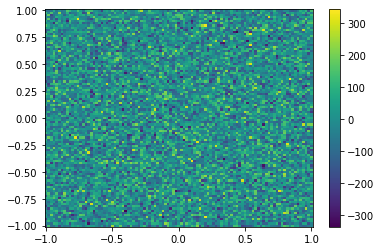

0 [ 0.2 -0.3  0.3  0.4]
9678.966
[-0.08644336  0.07003506  1.4799073   3.1933851 ]
9678.839
[0.01624092 0.14800404 1.4036827  3.2275062 ]
9678.719
[0.17293674 0.31502226 1.3149717  3.0978262 ]
9678.608
[0.40879324 0.592987   1.241205   2.776742  ]
9678.516
[0.7440338 0.9585771 1.2436743 2.3294027]
9678.432
[1.1844642 1.3358369 1.443634  1.9068673]
9678.335
[1.7355238 1.6315337 2.0747974 1.6152146]
9678.1875
[2.3928678 1.7182584 3.7077456 1.413681 ]
9677.869
[2.343078  1.0950847 7.8111258 1.266007 ]
9677.375
[-15.182051    -3.9100509   -4.3025513    0.40904713]
10 [ 0.26270556 -0.33955288  0.1258181   0.18764323]
9679.036
[17.828917   5.387271  -5.6595697 -8.670528 ]
9678.213
[-0.9402485  -0.30844802  4.5568967   4.436752  ]
9677.767
[-3.1149433 -0.659892   5.29478    4.1082516]
9677.199
[-12.377596   -3.3415143   2.5343342  -1.5443039]
9678.443
[44.94989    7.549257  -8.6888275 -9.481537 ]
9679.51
[-5.052581  -0.1745328 -2.8398502  3.7161503]
9679.025
[-4.6010566   0.02785693 -2.686879

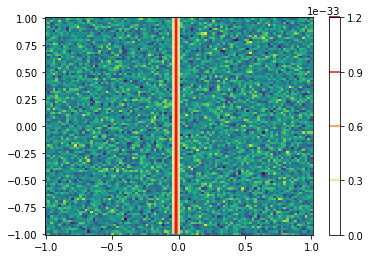

MovieWriter ffmpeg unavailable; using Pillow instead.


FileNotFoundError: [Errno 2] No such file or directory: '/home/bec_lab/python/BECViewer/pckg/fit/Fabio_animations'

In [4]:
#%%
import numpy as np
import jax.numpy as jnp
from jax import random, grad
from jax.config import config
import matplotlib.pyplot as plt
#%%
def make_key():
    """ Helper function to generate a key for jax's parallel PRNG 
    using standard numpy random functions. 

    """
    seed = np.random.randint(2**16 - 1)
    return random.PRNGKey(seed)
#%%
x = jnp.arange(-1, 1.02, step=.02)
y = jnp.arange(-1, 1.02, step=.02)
xm, ym = jnp.meshgrid(x, y)

def Gaussian(params, x=xm, y=ym):
    """Compute a 2D Gaussian of x and y. Params should consist of
    A, x_0, y_0, sigma_x, sigma_y, offset in that order."""
    return 1/(abs(2*np.pi*params[2]*params[3]))*jnp.exp(-(1/2)*(((x-params[0])/params[2])**2\
        +((y-params[1])/params[3])**2))

para_gt = jnp.array((0.1, -0.4, .5, .35))
gt_image = Gaussian(para_gt)
errs = 100*random.normal(make_key(), shape=jnp.shape(gt_image))
noisy_image = gt_image + errs

plt.figure()
plt.pcolormesh(x, y, noisy_image)
plt.colorbar()
plt.show()
#%%
def mse(z_hat, z):
    return jnp.mean((z_hat - z)**2)

def loss_fun(params, x=xm, y=ym, data=gt_image):
    preds = Gaussian(params, x, y)
    return mse(preds, data)

grad_loss_fun = grad(loss_fun, 0)
# %%
def gradient_descent_step(params, lr=1e-1, x=xm, y=ym):
    para_grad = grad_loss_fun(params, x, y, data=noisy_image)
    print(loss_fun(params, data=noisy_image))
    print(para_grad)
    params = params - lr*para_grad
    return params
#%%
# Optimalization time!!!!!!
initial_guess = jnp.array((0.2, -.3, .3, .4))
params_guess = initial_guess
gamma = 1e-2

for t in range(301):
    if (t % 10)==0:
        print(t, params_guess)

    new_params = gradient_descent_step(params_guess, gamma)

    rel_err = np.sqrt(np.mean((new_params - params_guess)**2))
    if rel_err < 1e-5:
        print(f"Converged with relative error = {rel_err:g} in {t} iterations")
        break

    params_guess = new_params

print(f"Final parameters: {params_guess}")

plt.figure()
plt.pcolormesh(x, y, noisy_image)
plt.contour(x, y, Gaussian(params_guess), 3, cmap="YlOrRd")
plt.colorbar()
plt.show()
# %%
from matplotlib import animation, rc
rc("animation", html="jshtml")

a_guess = initial_guess
fig, ax1 = plt.subplots()
z_hat = Gaussian(a_guess)
prefactor = abs(1/(2*np.pi*a_guess[2]*a_guess[3]))
ax1.contour(x, y, z_hat, prefactor*np.array([0.35, 0.63, 0.93]), cmap="YlOrRd")
plt.close()

def animate(i):
    global a_guess
    a_guess = gradient_descent_step(a_guess, gamma)
    z_hat = Gaussian(a_guess)
    prefactor = abs(1/(2*np.pi*a_guess[2]*a_guess[3]))
    ax1.clear()
    ax1.contour(x, y, z_hat, prefactor*np.array([0.35, 0.63, 0.93]), cmap="YlOrRd")
    ax1.pcolormesh(x, y, noisy_image)

gt_str = jnp.array_str(para_gt, precision=3)
guess_str = jnp.array_str(initial_guess, precision=3)
anime = animation.FuncAnimation(fig, animate, 400, interval=20)
anime.save(f"Fabio_animations/epic noisy animation with gt {gt_str} \
    and guess {guess_str}.mp4", \
        writer="ffmpeg")
plt.show()
# %%